## Import Libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [3]:
from sklearn import datasets
boston = datasets.load_boston()

In [4]:
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [5]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [9]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Q2: Print the head rows of the dataframe.

In [12]:
prices=boston.target

In [14]:
df['prices']=prices
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


## Q3: Use histogram to show the distribution of House Prices.

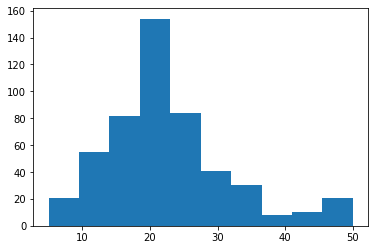

In [17]:
plt.hist(prices,bins=10);

## Q4: Use a heatmap to show the correlation between features and the target labels.

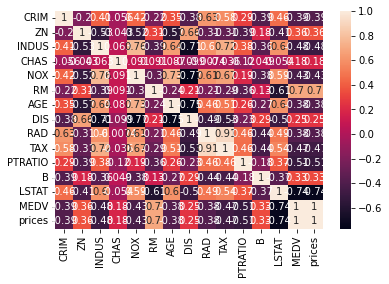

In [26]:
sns.heatmap(df.corr(), annot=True);

## Q5: Use a lmplot to draw the relations between price and LSTAT.

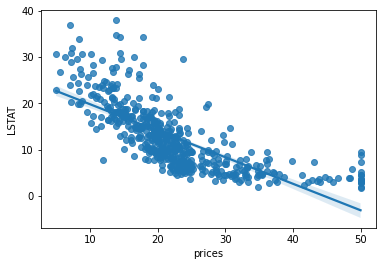

In [28]:
sns.regplot(x="prices", y="LSTAT", data=df);

## Q6: Use a lmplot to draw the relations between price and RM.

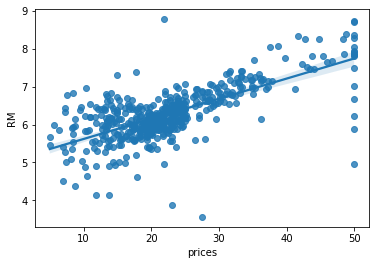

In [29]:
sns.regplot(x="prices", y="RM", data=df);

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'prices'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]
y = df['prices']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

## Q8: Build a Linear Regression Model.

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

## Q9: Train the Model.

In [57]:
lm.fit(X_train,y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [59]:
print(lm.intercept_) 

1.0658141036401503e-13


In [60]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,6.382360e-16
ZN,-1.526557e-16
INDUS,-2.862294e-16
CHAS,2.991000e-15
NOX,1.121673e-14
RM,1.798881e-15
AGE,4.462576e-16
DIS,9.570253e-16
RAD,-3.449931e-16
TAX,-1.075529e-16


In [41]:
predictions = lm.predict(X_test)
predictions

array([23.2, 22.1, 20.6, 17.8, 41.7, 17.2, 20.5, 31.2, 32. , 37.6, 13.3,
       24.5, 19.4, 23.8, 21. , 15.6, 37. , 23.6, 23.6, 22.8, 19.9, 23.2,
       24.6, 23.4, 17.2, 26.4, 37.2, 24.4, 25. , 21.9, 12.7, 14.1, 27.5,
       18.8, 27.9, 48.3, 25. , 32.5, 13.5, 36. , 17.8, 11.3, 15.6, 18.2,
       50. , 20. , 13.1, 19.3, 10.5, 43.5, 20.6,  8.8, 18.1, 14.2, 19.2,
       27.5,  7.4, 19.3, 22.5, 21.4, 19.6, 20.7, 24.1, 50. , 25.1, 24.1,
       13.1,  8.5, 24.8, 11. , 17.7, 13.8, 19.8, 16.1, 17.3, 13.3, 10.4,
       19.4, 12.3, 27.9, 23.1, 18.5, 30.1, 16.3, 25. , 19. , 33.2, 50. ,
       24.3, 13.4, 20.2, 18.3, 16.7, 18.5, 21.9, 14. , 50. , 18.6, 22. ,
       23.8, 13.9, 19.8, 29.4, 50. , 16. , 20.4, 29.8, 24.7, 13.3, 12.1,
       23. , 12.5, 30.7, 22.2, 29.6, 24.8, 12.7, 19.6, 21.6, 21.7, 22.5,
       19.9, 18.4, 27.5, 23.1, 15. , 18.4, 18.8, 22. ,  7.2, 24.6, 20.9,
       17.9, 19.7, 16.1, 20.8, 23.8, 16.6, 21.7, 50. , 15.6, 29.9, 33.3,
       10.5, 16.5, 31.7, 34.7, 28.1, 13.8,  8.7, 35

In [42]:
Real_Values = np.array(y_test)
Real_Values

array([23.2, 22.1, 20.6, 17.8, 41.7, 17.2, 20.5, 31.2, 32. , 37.6, 13.3,
       24.5, 19.4, 23.8, 21. , 15.6, 37. , 23.6, 23.6, 22.8, 19.9, 23.2,
       24.6, 23.4, 17.2, 26.4, 37.2, 24.4, 25. , 21.9, 12.7, 14.1, 27.5,
       18.8, 27.9, 48.3, 25. , 32.5, 13.5, 36. , 17.8, 11.3, 15.6, 18.2,
       50. , 20. , 13.1, 19.3, 10.5, 43.5, 20.6,  8.8, 18.1, 14.2, 19.2,
       27.5,  7.4, 19.3, 22.5, 21.4, 19.6, 20.7, 24.1, 50. , 25.1, 24.1,
       13.1,  8.5, 24.8, 11. , 17.7, 13.8, 19.8, 16.1, 17.3, 13.3, 10.4,
       19.4, 12.3, 27.9, 23.1, 18.5, 30.1, 16.3, 25. , 19. , 33.2, 50. ,
       24.3, 13.4, 20.2, 18.3, 16.7, 18.5, 21.9, 14. , 50. , 18.6, 22. ,
       23.8, 13.9, 19.8, 29.4, 50. , 16. , 20.4, 29.8, 24.7, 13.3, 12.1,
       23. , 12.5, 30.7, 22.2, 29.6, 24.8, 12.7, 19.6, 21.6, 21.7, 22.5,
       19.9, 18.4, 27.5, 23.1, 15. , 18.4, 18.8, 22. ,  7.2, 24.6, 20.9,
       17.9, 19.7, 16.1, 20.8, 23.8, 16.6, 21.7, 50. , 15.6, 29.9, 33.3,
       10.5, 16.5, 31.7, 34.7, 28.1, 13.8,  8.7, 35

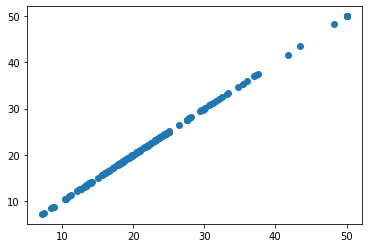

In [43]:
plt.scatter(Real_Values,predictions);

## Residual Histogram

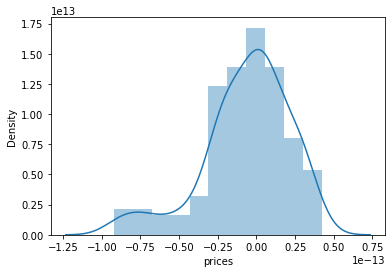

In [44]:
sns.distplot((y_test-predictions));

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [47]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.0989058444492433e-14
MSE: 8.273074946017832e-28
RMSE: 2.8762953509710774e-14


In [51]:
r2 = r2_score(y_test, predictions)
r2

1.0